In [1]:
import os
import argparse
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')
import sys
sys.argv = ['']

from modules_sl import *

In [2]:
# parse args
parser = argparse.ArgumentParser()

# job parameters
parser.add_argument('--jobid', type = str, default = '0', help = 'job id')
parser.add_argument('--path', type = str, default = os.path.join(os.getcwd(), 'results_sl'), help = 'path to store results')

# nework parameters
parser.add_argument('--hidden_size', type = int, default = 32, help = 'hidden size')
parser.add_argument('--key_size', type = int, default = 64, help = 'key size')

# environment parameters
parser.add_argument('--num_items', type = int, default = 3, help = 'number of items')
parser.add_argument('--num_targets', type = float, default = 6, help = 'number of targets')
parser.add_argument('--t_delay', type = float, default = 1, help = 'delay time')

args = parser.parse_args()

In [3]:
# set experiment path
exp_path = './results_sl/exp_em'

In [4]:
# load net
net = torch.load(os.path.join(exp_path, f'net.pth'))

# load data
with open(os.path.join(exp_path, f'data_simulation.p'), 'rb') as f:
    data = pickle.load(f)
num_trials = len(data['items'])
print(data.keys())

dict_keys(['items', 'hidden_seqs', 'key_seqs', 'value_seqs', 'query_seqs'])


In [5]:
items = np.array(data['items']) # (num_trials, num_items)
hiddens = np.array(data['hidden_seqs']) # (num_trials, num_steps, hidden_size)
keys = np.array(data['key_seqs']) # (num_trials, num_steps, key_size)
queries = np.array(data['query_seqs']) # (num_trials, num_steps, key_size)

print(items.shape)
print(hiddens.shape)
print(keys.shape)
print(queries.shape)

(10000, 3)
(10000, 7, 32)
(10000, 7, 64)
(10000, 7, 64)


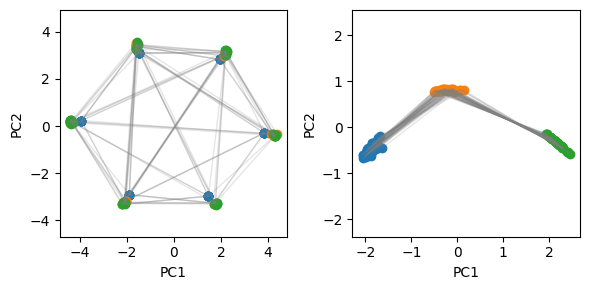

In [6]:
plt.figure(figsize = (6, 3))

for i in range(2):
    if i == 0:
        hiddens_selected = hiddens[:, :args.num_items, :] # get the first 3 stpes
    elif i == 1:
        hiddens_selected = hiddens[:, -args.num_items:, :] # get the last 3 stpes

    hiddens_selected = hiddens_selected.reshape(-1, args.hidden_size)

    pca = PCA(n_components = 2)
    hiddens_projected = pca.fit_transform(hiddens_selected)
    hiddens_projected = hiddens_projected.reshape((num_trials, args.num_items, 2))
    num_trials_to_plot = 50

    plt.subplot(1, 2, i + 1)

    for j in range(3):
        plt.scatter(hiddens_projected[:num_trials_to_plot, j, 0], hiddens_projected[:num_trials_to_plot, j, 1])

    for k in range(num_trials_to_plot):
        for t in range(args.num_items - 1):
            plt.plot(
                [hiddens_projected[k, t, 0], hiddens_projected[k, t + 1, 0]],
                [hiddens_projected[k, t, 1], hiddens_projected[k, t + 1, 1]], 
                color = 'gray', linewidth = 1, alpha = 0.2
            )
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.axis('equal')
    
plt.tight_layout()
plt.show()

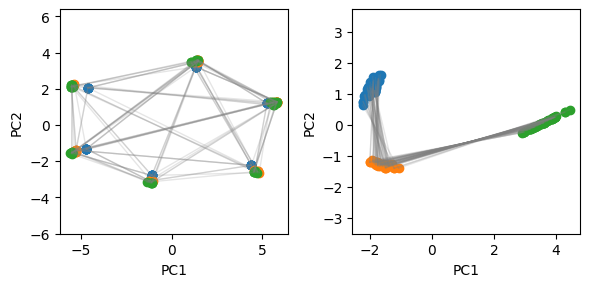

In [7]:
plt.figure(figsize = (6, 3))

for i in range(2):
    if i == 0:
        keys_selected = keys[:, :args.num_items, :] # get the first 3 stpes
    elif i == 1:
        keys_selected = keys[:, -args.num_items:, :] # get the last 3 stpes

    keys_selected = keys_selected.reshape(-1, args.key_size)

    pca = PCA(n_components = 2)
    keys_projected = pca.fit_transform(keys_selected)
    keys_projected = keys_projected.reshape((num_trials, args.num_items, 2))
    num_trials_to_plot = 50

    plt.subplot(1, 2, i + 1)

    for j in range(3):
        plt.scatter(keys_projected[:num_trials_to_plot, j, 0], keys_projected[:num_trials_to_plot, j, 1])

    for k in range(num_trials_to_plot):
        for t in range(args.num_items - 1):
            plt.plot(
                [keys_projected[k, t, 0], keys_projected[k, t + 1, 0]],
                [keys_projected[k, t, 1], keys_projected[k, t + 1, 1]], 
                color = 'gray', linewidth = 1, alpha = 0.2
            )
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.axis('equal')
    
plt.tight_layout()
plt.show()

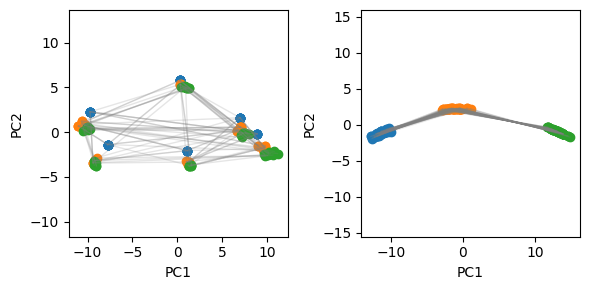

In [8]:
plt.figure(figsize = (6, 3))

for i in range(2):
    if i == 0:
        queries_selected = queries[:, :args.num_items, :] # get the first 3 stpes
    elif i == 1:
        queries_selected = queries[:, -args.num_items:, :] # get the last 3 stpes

    queries_selected = queries_selected.reshape(-1, args.key_size)

    pca = PCA(n_components = 2)
    queries_projected = pca.fit_transform(queries_selected)
    queries_projected = queries_projected.reshape((num_trials, args.num_items, 2))
    num_trials_to_plot = 50

    plt.subplot(1, 2, i + 1)

    for j in range(3):
        plt.scatter(queries_projected[:num_trials_to_plot, j, 0], queries_projected[:num_trials_to_plot, j, 1])

    for k in range(num_trials_to_plot):
        for t in range(args.num_items - 1):
            plt.plot(
                [queries_projected[k, t, 0], queries_projected[k, t + 1, 0]],
                [queries_projected[k, t, 1], queries_projected[k, t + 1, 1]], 
                color = 'gray', linewidth = 1, alpha = 0.2
            )
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.axis('equal')
    
plt.tight_layout()
plt.show()